# IC3D generated image best/worst visualization

In [8]:
import os
import pickle

import numpy as np
import pandas as pd
import torch

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from IPython.core.display import display


import sys
sys.path.insert(0, '../')
from model_utils import tensor2img
from PIL import Image

import importlib

In [9]:
parent_dir = '../test_aaegan/aaegan3Dv5_128D'
model_dir = parent_dir + os.sep + 'struct_model' 
opt = pickle.load( open( '{0}/opt.pkl'.format(model_dir), "rb" ) )

DP = importlib.import_module("data_providers." + opt.dataProvider)

data_path = './data_{0}x{1}.pyt'.format(str(opt.imsize), str(opt.imsize))
if os.path.exists(data_path):
    dp = torch.load(data_path)
else:
    dp = DP.DataProvider(opt.imdir)
    torch.save(dp, data_path)

In [13]:
# this csv file is generated by an R notebook: generated_image_errror_analysis.ipynb\
df_extr_preds = pd.read_csv('extremal_preds.csv')

In [16]:
ims_out = {}
for img_label in list(df_extr_preds.img_label.unique()):
    ims_out[img_label] = {}
    for img_phase in ["train", "test"]:
        ims_out[img_label][img_phase] = {}
        for rank_type in ["best", "worst"]:
            df_temp = df_extr_preds
            df_temp = df_temp.loc[df_temp['img_label'] == img_label]
            df_temp = df_temp.loc[df_temp['img_phase'] == img_phase]
            df_temp = df_temp.loc[df_temp['Type'] == rank_type]
            sort_bool = rank_type!="best"
            df_temp = df_temp.sort_values('pearson_orig_median', ascending=sort_bool)
            inds_to_inspect = list(df_temp['img_dp_index'])

            ims_out[img_label][img_phase][rank_type] = tensor2img(
                                                        torch.squeeze(dp.get_images(inds_to_inspect,img_phase)))

Alpha actinin: ←best/worst→ & ↑train/test↓


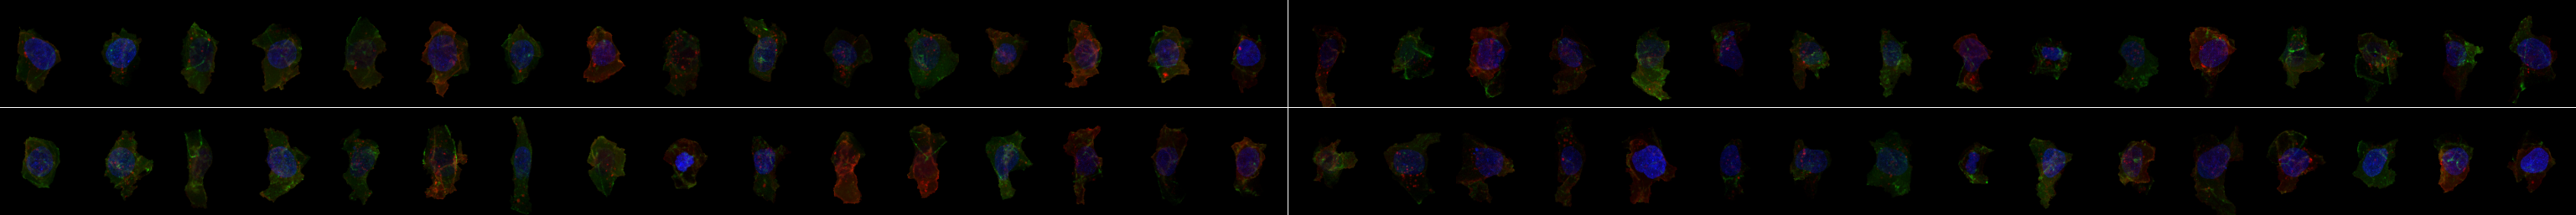

Alpha tubulin: ←best/worst→ & ↑train/test↓


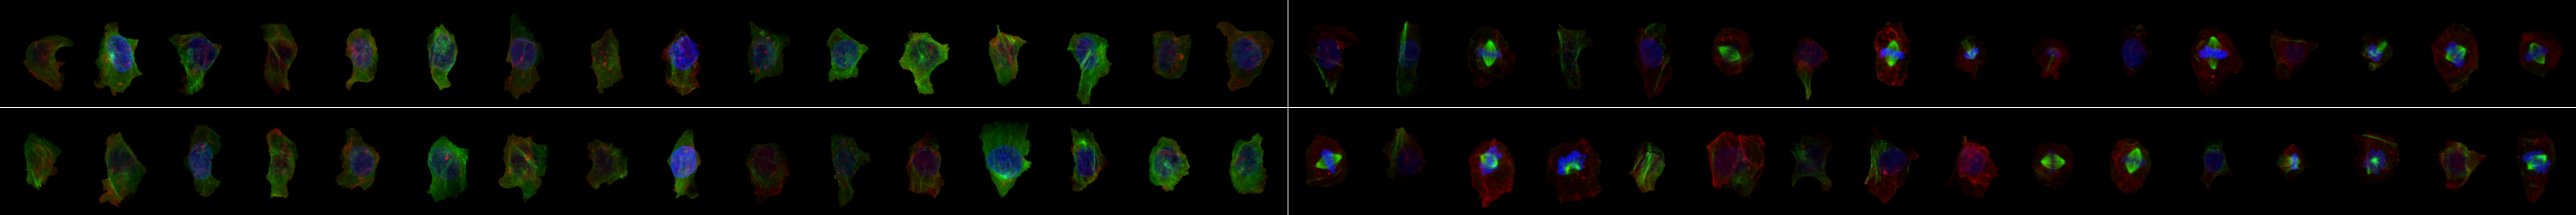

Beta actin: ←best/worst→ & ↑train/test↓


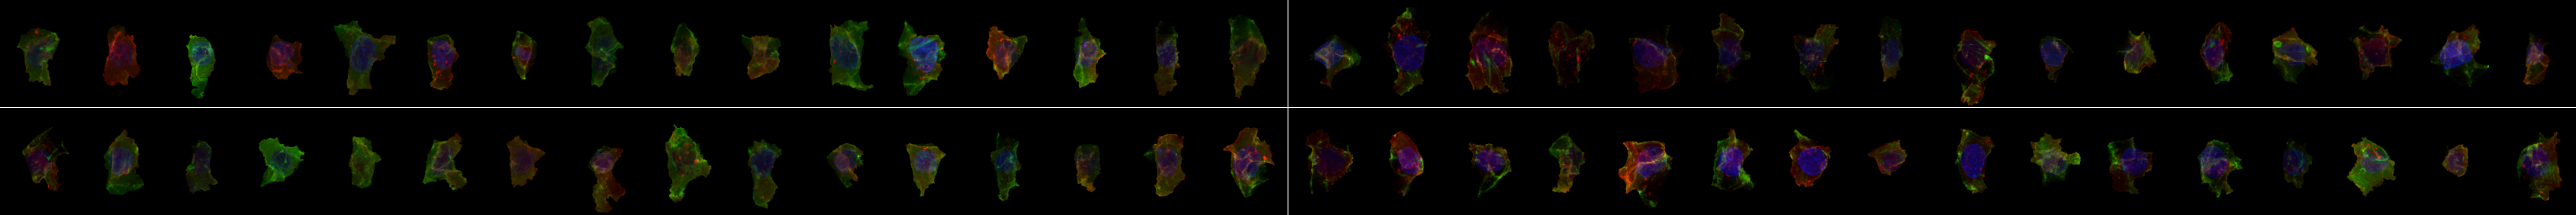

Desmoplakin: ←best/worst→ & ↑train/test↓


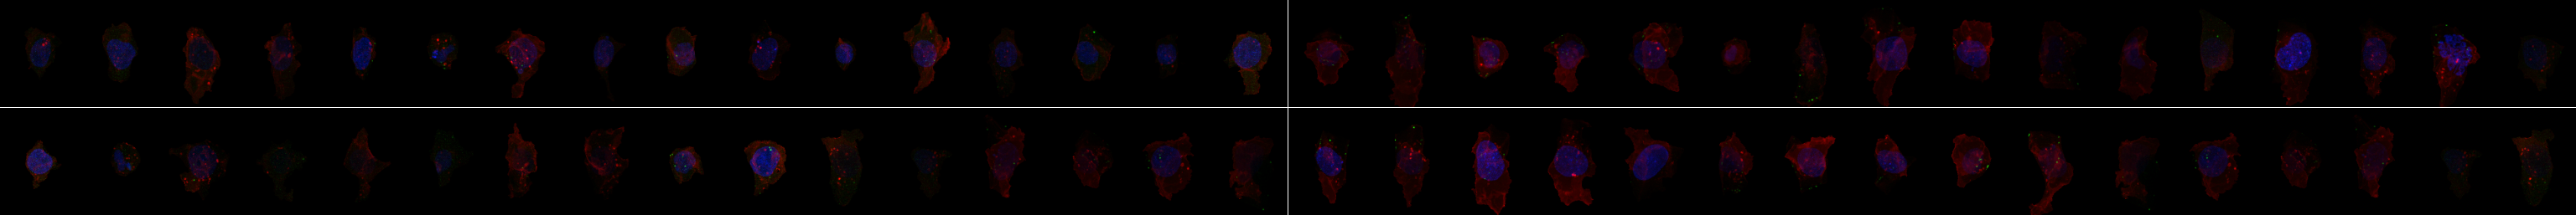

Fibrillarin: ←best/worst→ & ↑train/test↓


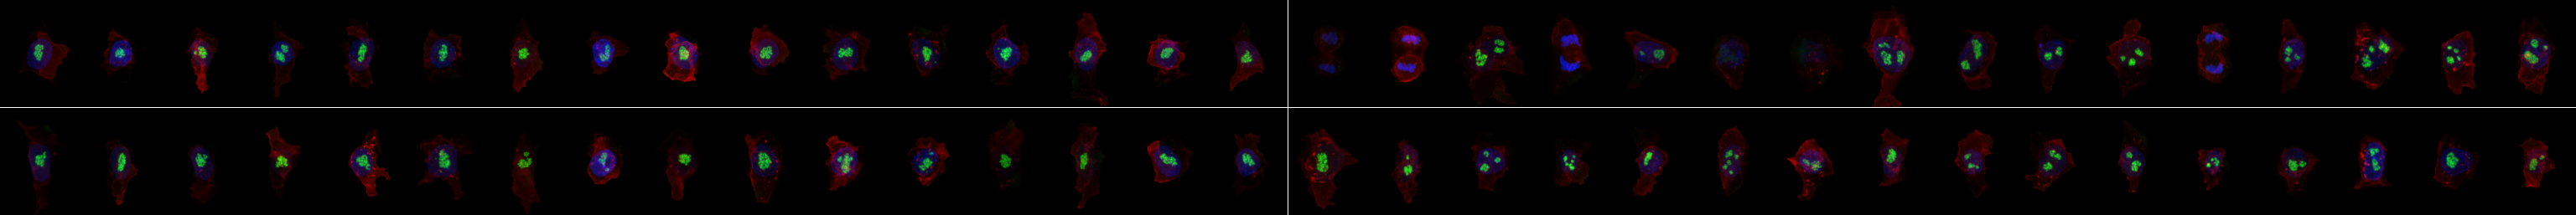

Lamin B1: ←best/worst→ & ↑train/test↓


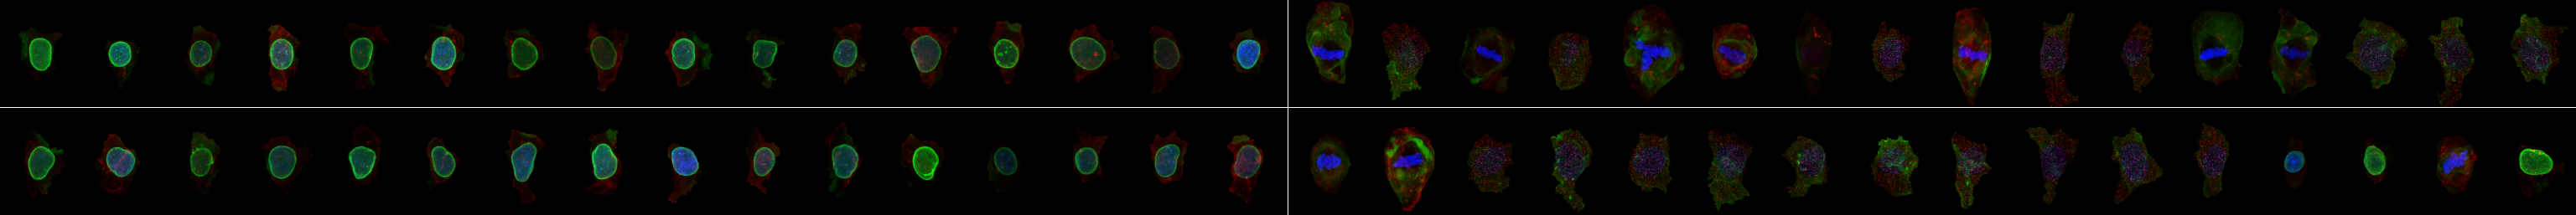

Myosin IIB: ←best/worst→ & ↑train/test↓


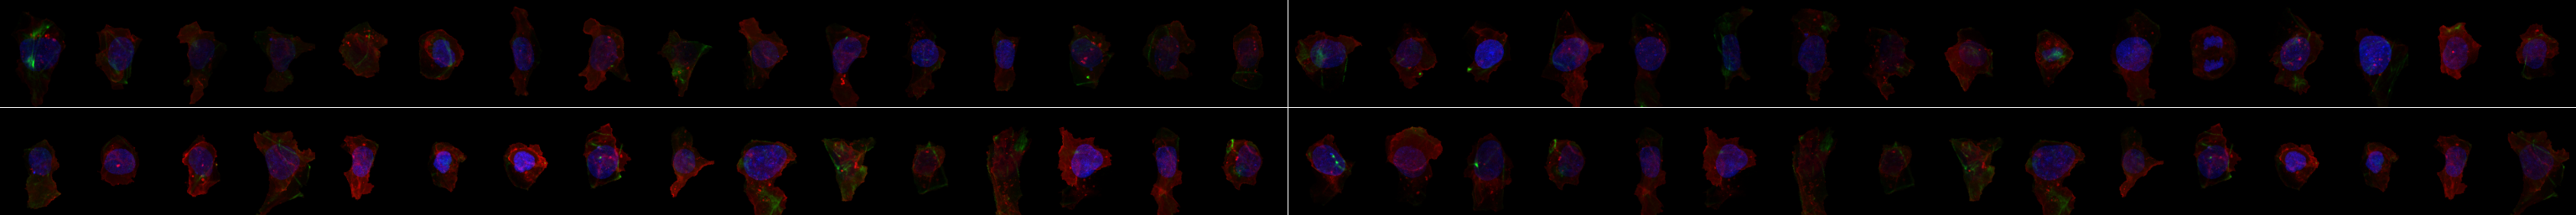

Sec61 beta: ←best/worst→ & ↑train/test↓


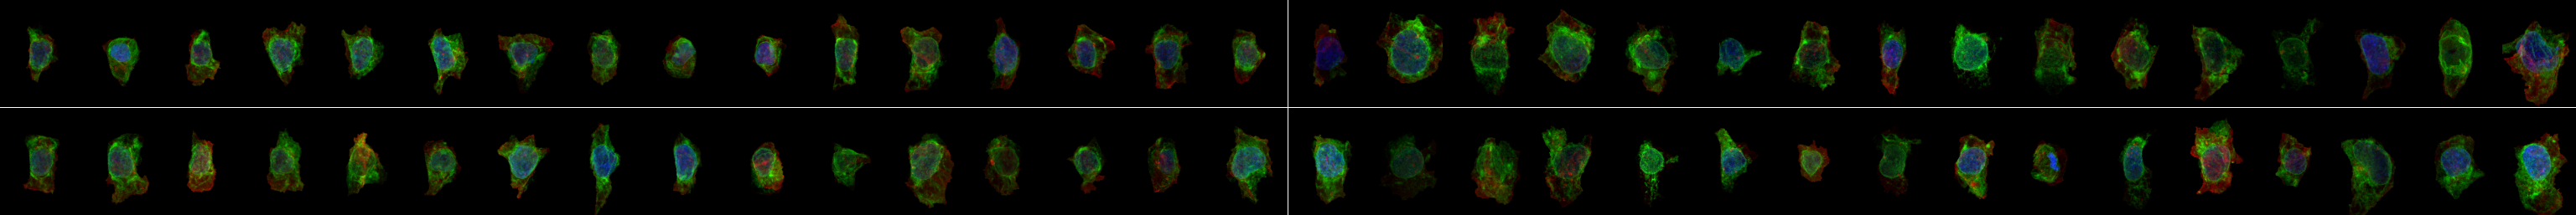

Tom20: ←best/worst→ & ↑train/test↓


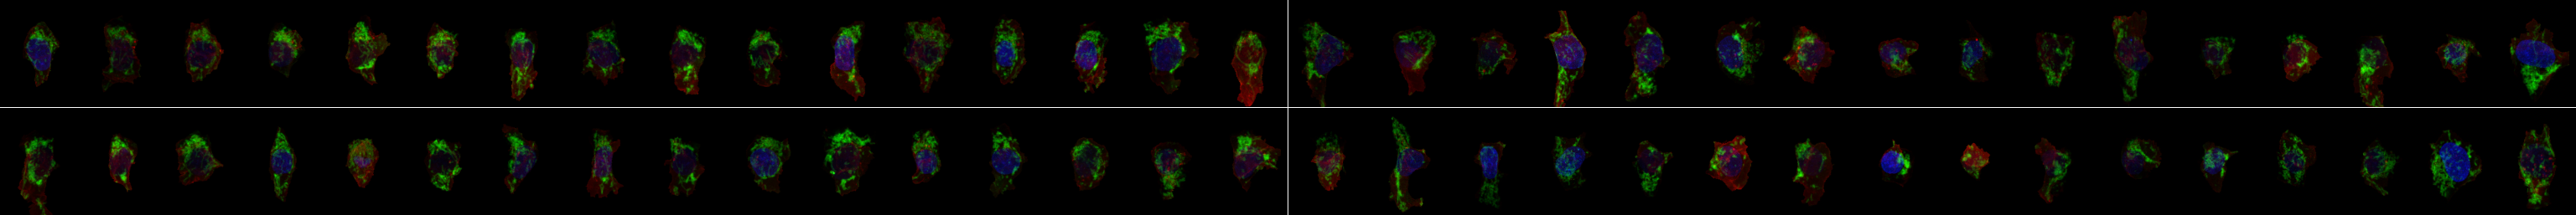

ZO1: ←best/worst→ & ↑train/test↓


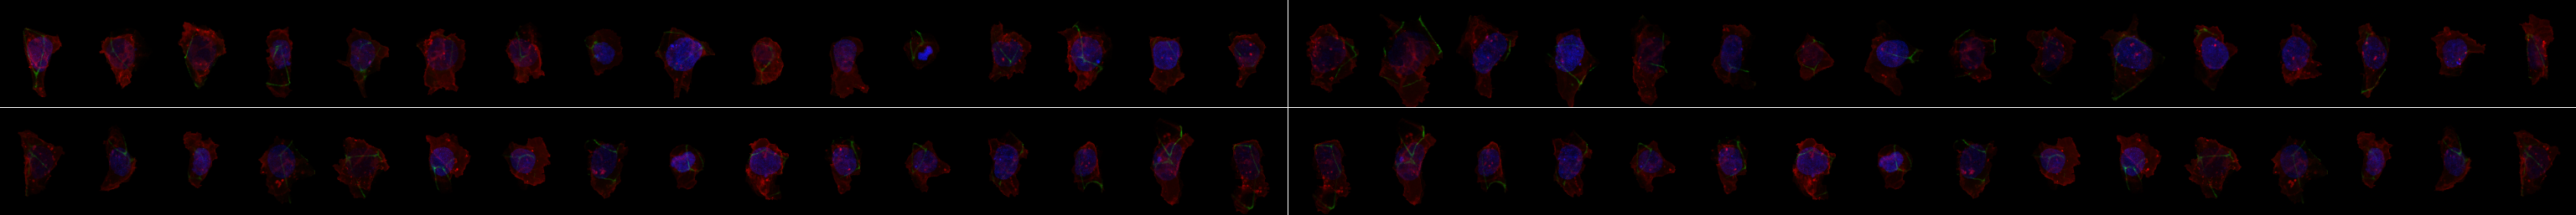

In [17]:
for img_label in sorted(list(df_extr_preds.img_label.unique())):
    
    line_width = 1
    train_ims = np.hstack([ims_out[img_label]["train"]["best"],
                           np.ones([ims_out[img_label]["train"]["best"].shape[0],line_width,3]),
                           ims_out[img_label]["train"]["worst"]])
    test_ims =  np.hstack([ims_out[img_label]["test"]["best"],
                           np.ones([ims_out[img_label]["train"]["best"].shape[0],line_width,3]),
                           ims_out[img_label]["test"]["worst"]])
    all_label_ims = np.vstack([train_ims,
                               np.ones([1,train_ims.shape[1],3]),
                               test_ims])
    
    print("{}: \u2190best/worst\u2192 & \u2191train/test\u2193".format(img_label))
    display(Image.fromarray(np.asarray(all_label_ims*255, 'uint8'), 'RGB'))